In [1]:
import pandas as pd
import plotly.express as px

In [2]:
data = pd.read_csv("clean_topairport_delays_2013_2018.csv")

In [3]:
df1 = pd.DataFrame(data)

In [4]:
indexNames = df1[ df1['flight_year'] < 2016].index

In [5]:
df1.drop(indexNames, inplace = True)

In [6]:
original = df1.groupby(df1["airport_name"])["arr_flights"]

In [7]:
topten =  pd.DataFrame(original.sum().sort_values(ascending=False).head(10))

In [8]:
topten

,arr_flights
airport_name,
"Atlanta, GA: Hartsfield-Jackson Atlanta International",1138927.0
"Chicago, IL: Chicago O'Hare International",843208.0
"Denver, CO: Denver International",685479.0
"Dallas/Fort Worth, TX: Dallas/Fort Worth International",656511.0
"Los Angeles, CA: Los Angeles International",648800.0
"San Francisco, CA: San Francisco International",523011.0
"Phoenix, AZ: Phoenix Sky Harbor International",487615.0
"Las Vegas, NV: McCarran International",463568.0
"Charlotte, NC: Charlotte Douglas International",457082.0


In [9]:
topten.to_csv("top_ten_busiest_airports_2016_2018.csv", index=True)

In [10]:
bottomten= pd.DataFrame(original.sum().sort_values(ascending=True).head(10))

In [11]:
bottomten

,arr_flights
airport_name,
"Miami, FL: Miami International",225493.0
"New York, NY: John F. Kennedy International",321829.0
"Newark, NJ: Newark Liberty International",375824.0
"Orlando, FL: Orlando International",396042.0
"Seattle, WA: Seattle/Tacoma International",409789.0
"Houston, TX: George Bush Intercontinental/Houston",440098.0
"Charlotte, NC: Charlotte Douglas International",457082.0
"Las Vegas, NV: McCarran International",463568.0
"Phoenix, AZ: Phoenix Sky Harbor International",487615.0


In [12]:
bottomten.to_csv("bottom_ten_busiest_airports_2016_2018.csv", index=True)

In [13]:
csv1 = pd.read_csv('top_ten_busiest_airports_2016_2018.csv')
csv2 = pd.read_csv('bottom_ten_busiest_airports_2016_2018.csv')

In [14]:
#Rename columns: year, month and date
rename_airport_data = csv1.rename(columns={
    "airport_name": "Airport Names",
    "arr_flights": "Number of Flights",
    })
#Rename columns: year, month and date
rename_airport_data2 = csv2.rename(columns={
    "airport_name": "Airport Names",
    "arr_flights": "Number of Flights"
    })

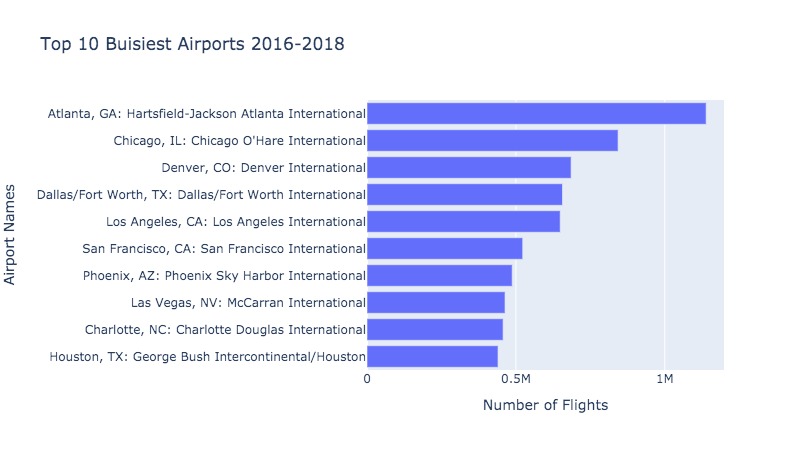

In [18]:
fig = px.bar(rename_airport_data, x='Number of Flights', y='Airport Names', orientation = 'h', title="Top 10 Buisiest Airports 2016-2018")
fig.update_layout(
    yaxis=dict(
        autorange="reversed"
    )
)
fig.show()

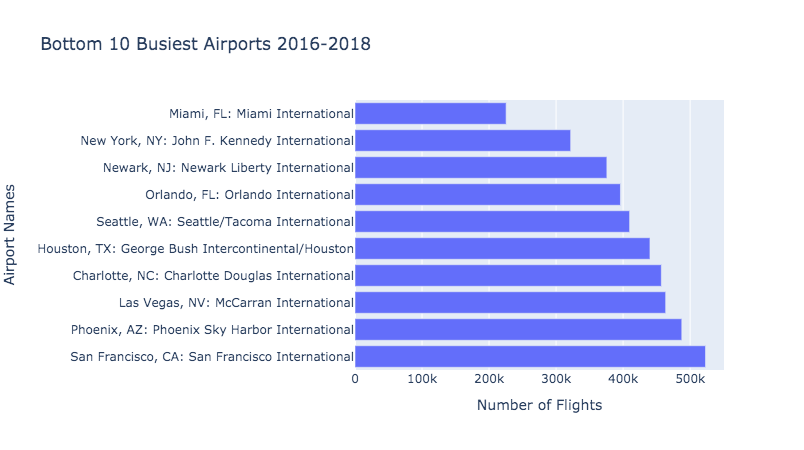

In [17]:
fig = px.bar(rename_airport_data2, x='Number of Flights', y='Airport Names', orientation='h', title="Bottom 10 Busiest Airports 2016-2018")
fig.update_layout(
    yaxis=dict(
        autorange="reversed"
    )
)
fig.show()